In [2]:
!pip install gapminder
!pip install pycountry


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached pycountry-22.3.5-py2.py3-none-any.whl

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from gapminder import gapminder

# Get data from Gapminder

In [6]:
# Filter the data for population information
population_data = gapminder[['year', 'country', 'pop']]

# Display the population data
population_data.head()

,year,country,pop
0,1952,Afghanistan,8425333
1,1957,Afghanistan,9240934
2,1962,Afghanistan,10267083
3,1967,Afghanistan,11537966
4,1972,Afghanistan,13079460


# Add country codes

## Helper function to get country codes

In [4]:
def get_country_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)
        return country[0].alpha_3
    except:
        return None

In [5]:
get_country_code("France")

'FRA'

## Create mapping table

In [1]:
all_countries = list(gapminder["country"].unique())
len(all_countries)

NameError: name 'gapminder' is not defined

In [10]:
country_mapping = []
for country in all_countries:
    country_mapping.append({"country":country,"country_code":get_country_code(country)})
country_mapping = pd.DataFrame(country_mapping)
country_mapping.head()

,country,country_code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG


## Merge with gapminder dataset

In [11]:
population_data = population_data.merge(country_mapping,on = "country")
population_data.head()

,year,country,pop,country_code
0,1952,Afghanistan,8425333,AFG
1,1957,Afghanistan,9240934,AFG
2,1962,Afghanistan,10267083,AFG
3,1967,Afghanistan,11537966,AFG
4,1972,Afghanistan,13079460,AFG


# CSV Export

In [17]:
population_data.to_csv("../../processed/population_gapminder.csv",index = False)

# Visualisation

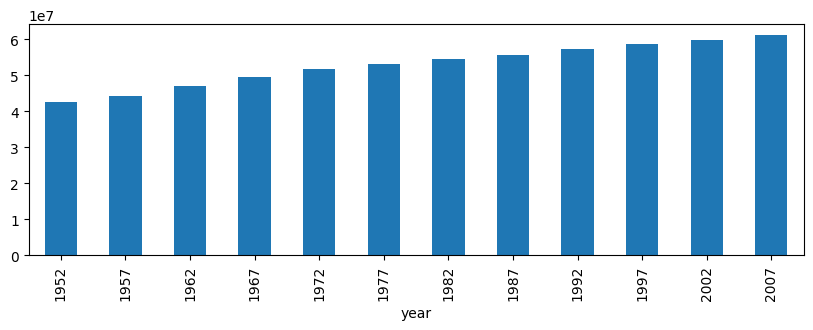

In [23]:
population_data.query("country_code=='FRA'").set_index("year")["pop"].plot(kind = "bar",figsize = (10,3))
plt.show()

# Note

## Gapminder does not have all the year included

## Gapminder includes GDP data as well

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## All the countries are not in Gapminder, total are not correct

> Gapminder dataset might not cover all countries, and the total population calculated using this dataset might not be equal to the actual world population.